## Prerequisites:

### Vectors:

![alt text](./images/vector.png "Vector Representation")

In [1]:
import numpy as np

x = [3,4]

# magnitude of the vector
np.linalg.norm(x)

5.0

In [2]:
# direction of the vector

# Compute the direction of a vector x. 
def direction(x): 
    return x/np.linalg.norm(x)

In [3]:
u = np.array([3,4])  
w = direction(u) 
 
print(w) # [0.6 , 0.8]  

[0.6 0.8]


In [4]:
# vectors having same direction will have same direction vector
u_1 = np.array([3,4]) 
u_2 = np.array([30,40]) 
 
print(direction(u_1)) # [0.6 , 0.8] 
print(direction(u_2)) # [0.6 , 0.8]

[0.6 0.8]
[0.6 0.8]


We say now that an n-dimensional vector is a tuple of n real-valued numbers

## Dot product

![alt text](./images/dotProduct.png)

In [5]:
import math 
import numpy as np 
 
def geometric_dot_product(x,y, theta): 
    x_norm = np.linalg.norm(x) 
    y_norm = np.linalg.norm(y) 
    return x_norm * y_norm * math.cos(math.radians(theta)) 

In [6]:
theta = 45  
x = [3,5] 
y = [8,2] 
 
print(geometric_dot_product(x,y,theta))  # 34.0 

34.00000000000001


In [7]:
# algebraic def of dot product

def dot_product(x,y): 
    result = 0 
    for i in range(len(x)): 
        result = result + x[i]*y[i] 
    return result 

In [8]:
x = [3,5] 
y = [8,2] 
print(dot_product(x,y)) # 34 

34


In [9]:
# library version

import numpy as np 
 
x = np.array([3,5]) 
y = np.array([8,2]) 
 
print(np.dot(x,y)) # 34 

34


## Linear Separability


### Any data is linearly separable if:
#### In one dimension, you can find a point separating the data
![alt text](./images/linearSeparable.png)

#### In one dimension, you can find a line separating the data
![alt text](./images/linearSeparableLine.png)

#### In one dimension, you can find a plane separating the data
![alt text](./images/linearSeparablePlane.png)

### Non linearly separable data:
![alt text](./images/nonLinearSeparable.png)



## Hyperplane:
### Used to separated data that is of more than 3 dimensions
A hyperplane is a subspace of one dimension less than its ambient space

f(x) = ax + b or  y = ax + b or x2 = ax1 + b

Define two dimensional vectors:

x = (x1,x2) and w = (a, -1)
w.x + b = 0

# SVM Optimization

## SVMs search for the optimal hyperplane

### Geometric Margin:
The distance between a point X and the hyperplane \
![alt text](./images/geometricMargin.png)
![alt text](./images/geometricMarginFormula.png)



In [10]:
# Compute the geometric margin of an example (x,y) 
# with respect to a hyperplane defined by w and b. 
def example_geometric_margin(w, b, x, y): 
    norm = np.linalg.norm(w) 
    result = y * (np.dot(w/norm, x) + b/norm) 
    return result 
 
# Compute the geometric margin of a hyperplane 
# for examples X with labels y. 
def geometric_margin(w, b, X, y): 
    return np.min([example_geometric_margin(w, b, x, y[i]) 
                  for i, x in enumerate(X)]) 


In [11]:
# check if geometric margin is robust to scaling of w and b

x = np.array([1,1]) 
y = 1 
 
b_1 = 5 
w_1 = np.array([2,1]) 
 
w_2 = w_1*10 
b_2 = b_1*10 
 
print(example_geometric_margin(w_1, b_1, x, y))  # 3.577708764 
print(example_geometric_margin(w_2, b_2, x, y))  # 3.577708764 

3.577708763999664
3.577708763999664


### Comparing hyperplanes
![alt text](./images/hyperplaneComparison.png)

In [12]:
# comparing two hyperplanes by geometric margin

positive_x = [[2,7],[8,3],[7,5],[4,4],[4,6],[1,3],[2,5]] 
negative_x = [[8,7],[4,10],[9,7],[7,10],[9,6],[4,8],[10,10]] 
 
X = np.vstack((positive_x, negative_x)) 
y = np.hstack((np.ones(len(positive_x)), -1*np.ones(len(negative_x)))) 
 
w = np.array([-0.4, -1]) 
b = 8 
 
# change the value of b 
print(geometric_margin(w, b, X, y))          # 0.185695338177 
print(geometric_margin(w, 8.5, X, y))        # 0.64993368362 

0.18569533817705164
0.6499336836196807


Just by changing the value of w and b we can now find a new hyperplane, we need to find the most optimal hyperplane that separates the data well and has the largest the geometric margin.

## Optimization problem solving methods

1) Lagrange multipliers \
![alt text](./images/lagrangeMultipliers.png) \
Works well with inequality constrains if KKT conditions are met.

2) Wolfe dual problem \
![alt text](./images/wolfeDualProblem.png ) \
Objective function W depends only on the Lagrange multipliers

Karush-Kuhn-Tucker conditions: \
![alt text](./images/KKT.png)


## After calculating the multipliers:

1) We calculate w
2) We calculate b

## A python package to solve quadratic problems:
### QP solver --> CVXOPT package

#### Difference between linearly separable and non separable data -->

Text(0.5, 1.0, 'Linear Not Separable 2')

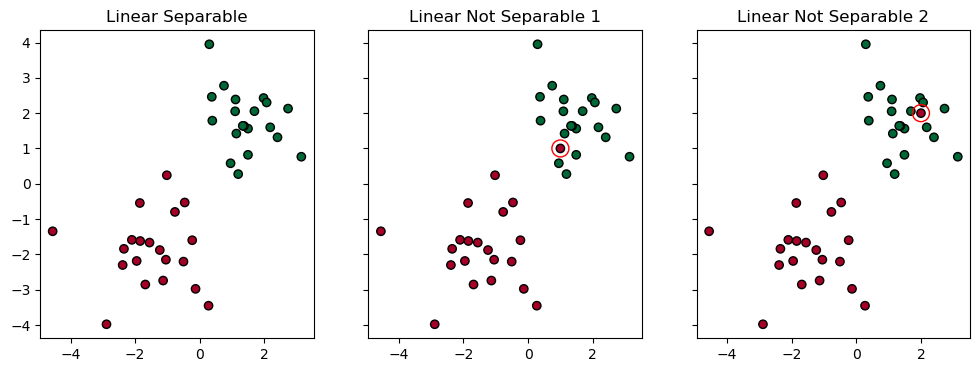

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

a = np.array([1,1])
X_new = np.vstack((X, a))
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True)

ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax1.set_title('Linear Separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax2.set_title('Linear Not Separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax3.set_title('Linear Not Separable 2')

#### Using CVXOPT to solve hard margin SVM

In [14]:
import cvxopt.solvers
from datasets import get_dataset
import linearly_separable as ls
 
X, y = get_dataset(ls.get_training_examples)
m = X.shape[0]  
 
# Gram matrix - The matrix of all possible inner products of X. 
K = np.array([np.dot(X[i], X[j]) 
              for j in range(m) 
              for i in range(m)]).reshape((m, m)) 
 
P = cvxopt.matrix(np.outer(y, y) * K) 
q = cvxopt.matrix(-1 * np.ones(m)) 
 
# Equality constraints 
A = cvxopt.matrix(y, (1, m)) 
b = cvxopt.matrix(0.0) 
 
# Inequality constraints 
G = cvxopt.matrix(np.diag(-1 * np.ones(m))) 
h = cvxopt.matrix(np.zeros(m)) 
 
# Solve the problem 
solution = cvxopt.solvers.qp(P, q, G, h, A, b) 
 
# Lagrange multipliers 
multipliers = np.ravel(solution['x']) 
 
# Support vectors have positive multipliers. 
has_positive_multiplier = multipliers > 1e-7 
sv_multipliers = multipliers[has_positive_multiplier] 
 
support_vectors = X[has_positive_multiplier] 
support_vectors_y = y[has_positive_multiplier] 

     pcost       dcost       gap    pres   dres
 0: -3.9356e+00 -7.2072e+00  4e+01  6e+00  2e+00
 1: -5.9831e+00 -4.3032e+00  1e+01  2e+00  6e-01
 2: -5.6350e-01 -1.1535e+00  2e+00  1e-01  4e-02
 3: -6.2758e-01 -7.4538e-01  1e-01  9e-17  7e-15
 4: -7.1507e-01 -7.1641e-01  1e-03  1e-16  8e-15
 5: -7.1604e-01 -7.1605e-01  1e-05  1e-16  9e-15
 6: -7.1605e-01 -7.1605e-01  1e-07  2e-16  8e-15
Optimal solution found.


#### Computing w and b

In [15]:
def compute_w(multipliers, X, y): 
    return np.sum(multipliers[i] * y[i] * X[i] 
                  for i in range(len(y))) 

In [16]:
w = compute_w(multipliers, X, y) 
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y) 
 
print(w)          # [0.44444446 1.11111114] 
print(w_from_sv)  # [0.44444453 1.11111128]

[0.44444446 1.11111114]
[0.44444453 1.11111128]


C:\Users\Badal\AppData\Local\Temp\ipykernel_24888\3838747775.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


In [17]:
def compute_b(w, X, y): 
    return np.sum([y[i] - np.dot(w, X[i])  
                   for i in range(len(X))])/len(X) 

In [18]:
b = compute_b(w, support_vectors, support_vectors_y) # -9.666668268506335 

#### Plotting the data and the SVM line

Text(0.5, 1.0, 'SVM')

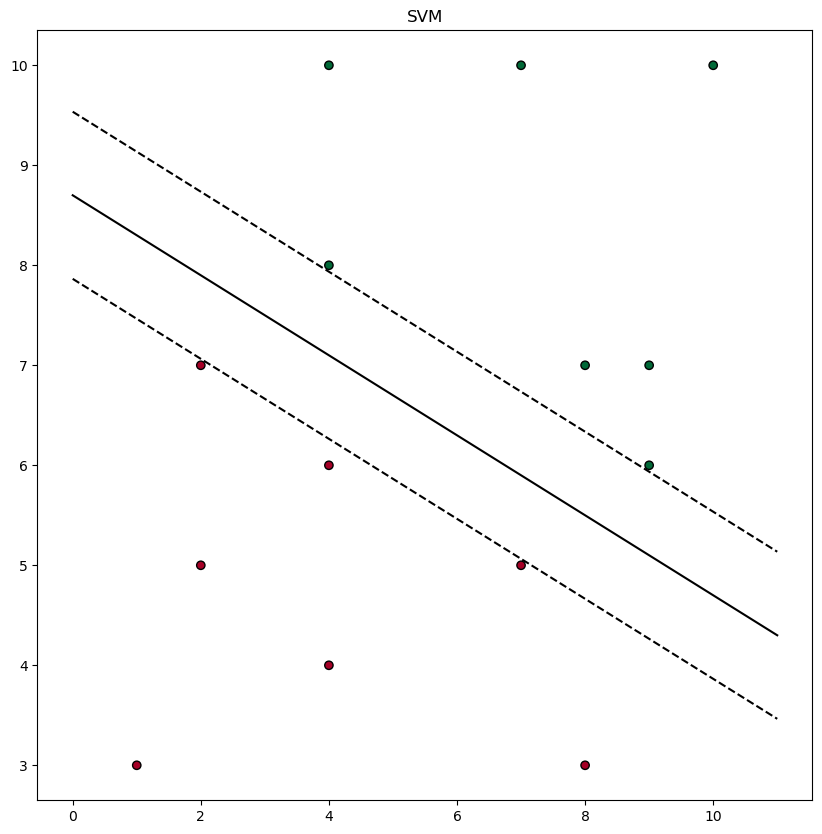

In [19]:
# plot the data
margin = 1/np.linalg.norm(w)

ax1 = plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap='RdYlGn',
                edgecolors='k')

# plot the separating hyperplaneusing w_from_sv and b
x_hyperplane = np.linspace(0, 11)
y_hyperplane = - (w_from_sv[0] * x_hyperplane + b) / w_from_sv[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')

plt.title('SVM')

This formulation is called hard margin SVM, it does not work when the data is not linearly separable.

## Soft-Margin SVM

### Slack variables -> allowing the classifier to make some mistakes

In [20]:
import numpy as np 
 
w = np.array([0.4, 1]) 
b = -10 
 
x = np.array([6, 8]) 
y = -1 
 
 
def constraint(w, b, x, y): 
    return y * (np.dot(w, x) + b) 

In [21]:
def hard_constraint_is_satisfied(w, b, x, y): 
    return constraint(w, b, x, y) >= 1 
 
 
def soft_constraint_is_satisfied(w, b, x, y, zeta): 
    return constraint(w, b, x, y) >= 1 - zeta 
 
 
# While the constraint is not satisfied for the example. 
print(hard_constraint_is_satisfied(w, b, x, y))               # False 
 
# We can use zeta = 2 and satisfy the soft constraint. 
print(soft_constraint_is_satisfied(w, b, x, y, zeta=2))       # True 

False
True


In [22]:
# We can pick a huge zeta for every point 
# to always satisfy the soft constraint. 
print(soft_constraint_is_satisfied(w, b, x, y, zeta=10))   # True 
print(soft_constraint_is_satisfied(w, b, x, y, zeta=1000)) # True 

True
True


### Updating the objective function
![alt text](./images/softMarginObjective.png)

#### updated formulation for the dual problem:
![alt text](./images/softMarginFormulation.png)

In [23]:
import cvxopt.solvers
from datasets import get_dataset
import non_separable_poly as nsp

X, y = get_dataset(nsp.get_training_examples)
m = X.shape[0]  

#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt.matrix(H)
q = cvxopt.matrix(-np.ones((m, 1)))
G = cvxopt.matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt.matrix(y.reshape(1, -1))
b = cvxopt.matrix(np.zeros(1))
 
# Solve the problem 
solution = cvxopt.solvers.qp(P, q, G, h, A, b) 
 
# Lagrange multipliers 
multipliers = np.ravel(solution['x']) 
 
# Support vectors have positive multipliers. 
has_positive_multiplier = multipliers > 1e-7 
sv_multipliers = multipliers[has_positive_multiplier] 
 
support_vectors = X[has_positive_multiplier] 
support_vectors_y = y[has_positive_multiplier] 

     pcost       dcost       gap    pres   dres
 0: -6.5730e+01 -6.6130e+02  6e+02  9e-15  9e-13
 1: -7.3827e+01 -1.3083e+02  6e+01  6e-15  6e-13
 2: -9.4074e+01 -1.1170e+02  2e+01  1e-16  7e-13
 3: -9.9532e+01 -1.0099e+02  1e+00  7e-15  8e-13
 4: -1.0007e+02 -1.0010e+02  2e-02  4e-15  1e-12
 5: -1.0008e+02 -1.0008e+02  2e-04  1e-14  7e-13
 6: -1.0008e+02 -1.0008e+02  2e-06  5e-15  1e-12
Optimal solution found.


In [24]:
w = compute_w(multipliers, X, y) 
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y) 
 
print(w)
print(w_from_sv)

b = compute_b(w, support_vectors, support_vectors_y)

[0.28571428 0.28571428]
[0.28571379 0.28571389]


C:\Users\Badal\AppData\Local\Temp\ipykernel_24888\3838747775.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


Text(0.5, 1.0, 'SVM-Soft')

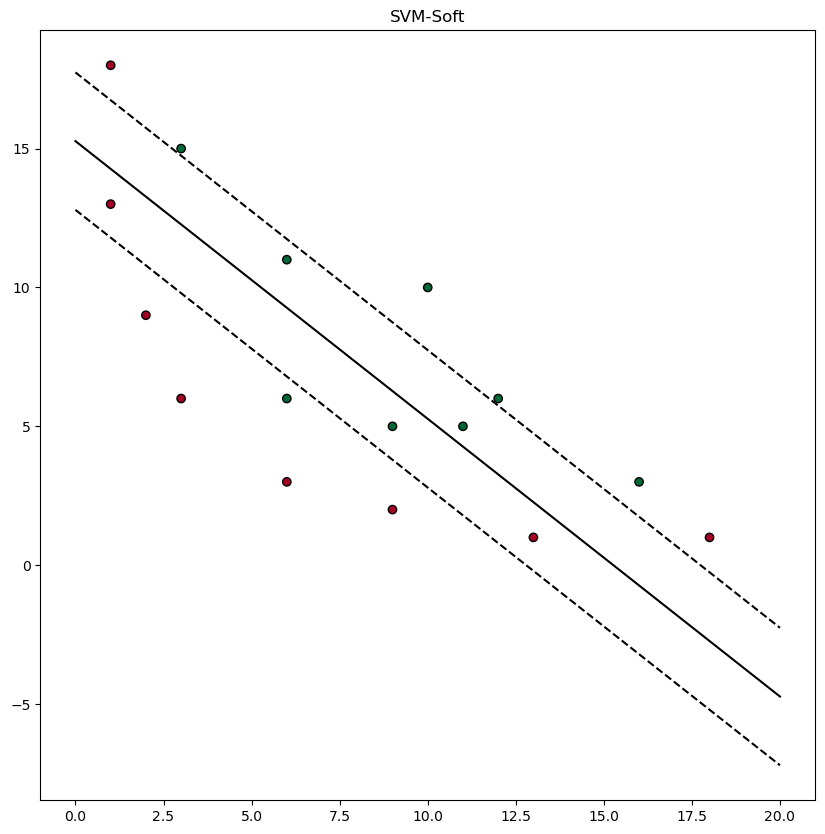

In [25]:
# plot the data
margin = 1/np.linalg.norm(w)
ax1 = plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                edgecolors='k')

# plot the separating hyperplaneusing w_from_sv and b
x_hyperplane = np.linspace(0, 20)
y_hyperplane = - (w_from_sv[0] * x_hyperplane + b) / w_from_sv[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')

plt.title('SVM-Soft')

In [26]:
def generateBatchXor(n, mu=0.5, sigma=0.5):
    """ Four gaussian clouds in a Xor fashion """
    X = np.random.normal(mu, sigma, (n, 2))
    yB0 = np.random.uniform(0, 1, n) > 0.5
    yB1 = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y0 = 2. * yB0 - 1
    y1 = 2. * yB1 - 1
    X[:,0] *= y0
    X[:,1] *= y1
    X -= X.mean(axis=0)
    return X, y0*y1

def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

def predict(X, supportVectors, supportAlphaY):
    """ Predict y values in {-1, 1} """
    # --->
    def predict1(x):
        x1 = np.apply_along_axis(lambda s: GRBF(s, x), 1, supportVectors)
        x2 = x1 * supportAlphaY
        return np.sum(x2)

    d = np.apply_along_axis(predict1, 1, X)
    return 2 * (d > 0) - 1

Text(0.5, 1.0, 'XOR')

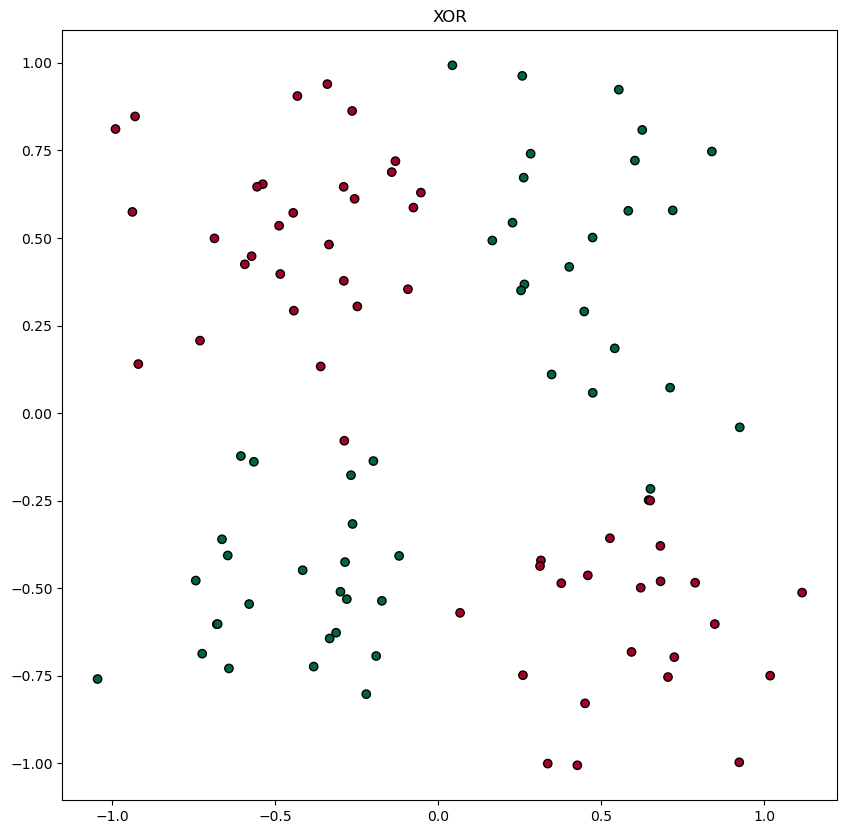

In [27]:
xTrain, yTrain = generateBatchXor(100, sigma=0.25)

# plot the data
ax1 = plt.figure(figsize=(10, 10))

plt.scatter(xTrain[:, 0], xTrain[:, 1], c=yTrain, cmap='RdYlGn',
                edgecolors='k')

plt.title('XOR')

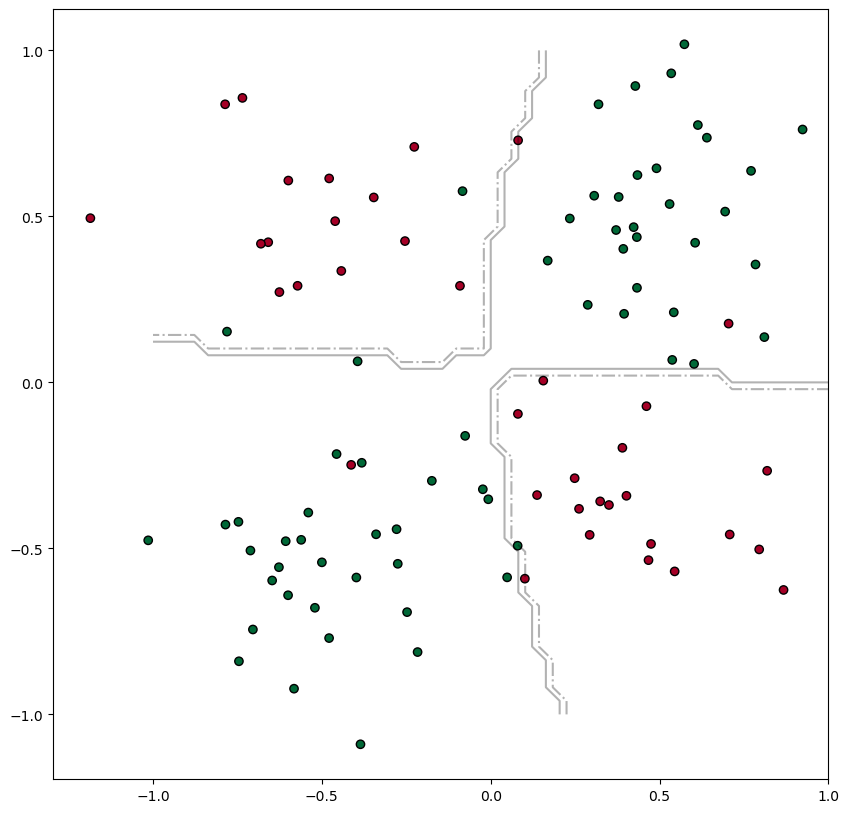

In [28]:
from scipy import optimize

C = 10
X, y = generateBatchXor(100, sigma=0.25)
N = len(y)
# --->
# Gram matrix of h(x) y
hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  GRBF(x1, x2), 1, X),
                            1, X)   
yp = y.reshape(-1, 1)
GramHXy = hXX * np.matmul(yp, yp.T) 
# <---

# Lagrange dual problem
def Ld0(G, alpha):
    return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

# Partial derivate of Ld on alpha
def Ld0dAlpha(G, alpha):
    return np.ones_like(alpha) - alpha.dot(G)

# Constraints on alpha of the shape :
# -  d - C*alpha  = 0
# -  b - A*alpha >= 0
A = np.vstack((-np.eye(N), np.eye(N)))             # <---
b = np.hstack((np.zeros(N), C * np.ones(N)))  # <---
constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

# Maximize by minimizing the opposite
optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                            x0=np.ones(N), 
                            method='SLSQP', 
                            jac=lambda a: -Ld0dAlpha(GramHXy, a), 
                            constraints=constraints)
alpha = optRes.x
# --->
epsilon = 1e-8
supportIndices = alpha > epsilon
supportVectors = X[supportIndices]
supportAlphaY = y[supportIndices] * alpha[supportIndices]

fig, ax1 = plt.subplots(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                edgecolors='k')

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = predict(xy, supportVectors, supportAlphaY).reshape(X0.shape)
ax1.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

     pcost       dcost       gap    pres   dres
 0:  2.5413e+02 -3.9122e+03  7e+03  3e-01  4e-15
 1:  1.3403e+02 -4.8477e+02  7e+02  1e-02  4e-15
 2: -1.4209e+01 -1.4597e+02  1e+02  1e-03  3e-15
 3: -3.8991e+01 -1.2762e+02  9e+01  6e-04  3e-15
 4: -6.1400e+01 -1.0207e+02  4e+01  8e-05  3e-15
 5: -6.9377e+01 -8.7682e+01  2e+01  2e-05  3e-15
 6: -7.4060e+01 -8.0169e+01  6e+00  5e-06  4e-15
 7: -7.6191e+01 -7.7209e+01  1e+00  6e-07  4e-15
 8: -7.6617e+01 -7.6668e+01  5e-02  5e-16  4e-15
 9: -7.6639e+01 -7.6640e+01  8e-04  6e-16  4e-15
10: -7.6640e+01 -7.6640e+01  8e-06  5e-15  4e-15
Optimal solution found.


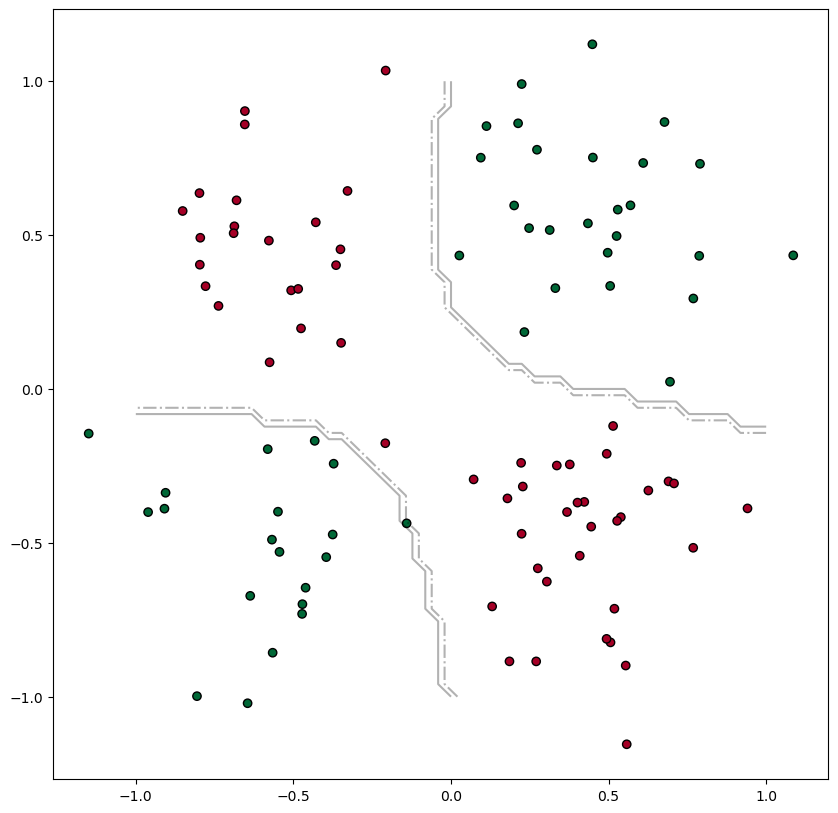

In [29]:
import cvxopt.solvers

X, y = generateBatchXor(100, sigma=0.25)
m = X.shape[0]  

C = 10
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i,j] = GRBF(X[i], X[j])

P = cvxopt.matrix(np.outer(y,y) * K)
q = cvxopt.matrix(np.ones(m) * -1)
A = cvxopt.matrix(y, (1,m))
b = cvxopt.matrix(0.0)

tmp1 = np.diag(np.ones(m) * -1)
tmp2 = np.identity(m)
G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
tmp1 = np.zeros(m)
tmp2 = np.ones(m) * C
h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
 
# Solve the problem 
solution = cvxopt.solvers.qp(P, q, G, h, A, b) 
 
# Lagrange multipliers 
alpha = np.ravel(solution['x'])
supportIndices = alpha > epsilon
supportVectors = X[supportIndices]
supportAlphaY = y[supportIndices] * alpha[supportIndices]

fig, ax1 = plt.subplots(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                edgecolors='k')

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = predict(xy, supportVectors, supportAlphaY).reshape(X0.shape)
ax1.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);